In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import resnet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB2
from glob import glob
from keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix


In [ ]:
print(tf.__version__)

2.19.0


In [ ]:
!pip install tensorflow==2.9.1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.9.1 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.9.1


In [ ]:
data_dir = pathlib.Path('dataset_retino')
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

# */* means firstly it will read the content like healthy and all then / means it will enter
#one of them and then again * means it will read images / things under that folder


2760


In [ ]:
severity_labels = [name for name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, name))]
print(severity_labels)
batch = 32
image_width = 256
image_height = 256

['Moderate DR', 'Severe DR', 'Mild DR', 'Healthy', 'Proliferate DR']


In [ ]:
X_train = []
y_train = []


In [ ]:
''' image read using cv2 function , resizing to 256 x 256 , saving the images in X_train and corresponding
labels  in y_train and finally converting the list to numpy array'''
for j in severity_labels:
        folderPath = os.path.join(data_dir,j)
        for k in tqdm(os.listdir(folderPath)):
            img = cv2.imread(os.path.join(folderPath,k))
            img = cv2.resize(img, (image_width,image_height))
            X_train.append(img)
            y_train.append(j)

X_train = np.array(X_train)
y_train = np.array(y_train)
print(y_train)

100%|██████████| 290/290 [00:10<00:00, 27.27it/s] 


['Moderate DR' 'Moderate DR' 'Moderate DR' ... 'Proliferate DR'
 'Proliferate DR' 'Proliferate DR']


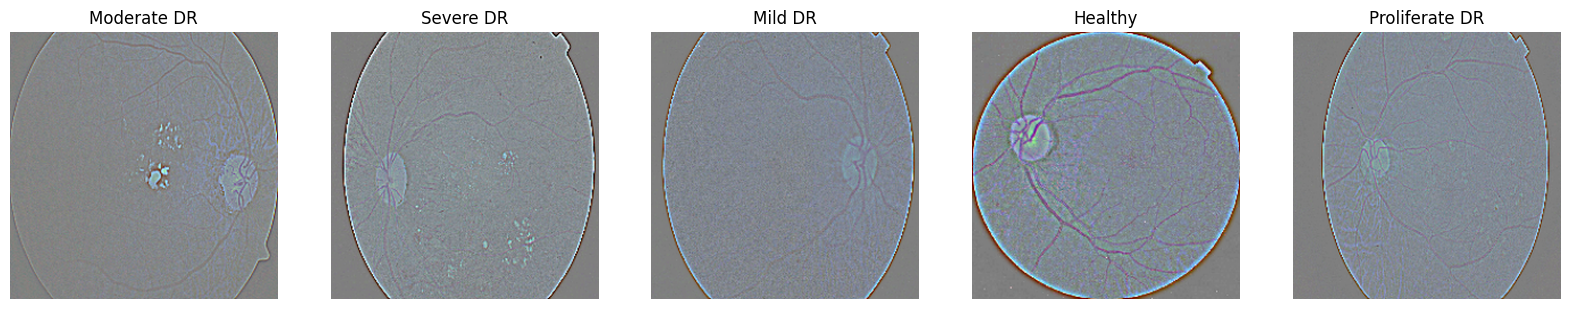

In [ ]:
k=0
fig, ax = plt.subplots(1,5,figsize=(20,20))

for i in severity_labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1


In [ ]:
X_train,y_train=shuffle(X_train,y_train, random_state=102)
X_train.shape
y_train.shape

(2760,)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.1,random_state=102)


In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2484
276
2484
276


In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(severity_labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(severity_labels.index(i))
print(y_test_new)
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)
print(y_test)

[3, 3, 0, 4, 2, 3, 0, 2, 4, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 3, 3, 3, 2, 3, 1, 4, 2, 4, 0, 0, 2, 2, 2, 2, 3, 3, 4, 3, 0, 3, 2, 2, 3, 1, 0, 4, 3, 3, 3, 1, 0, 0, 4, 3, 0, 3, 3, 1, 4, 0, 3, 0, 0, 3, 3, 0, 0, 2, 3, 3, 3, 4, 0, 2, 4, 0, 4, 4, 0, 4, 0, 3, 2, 3, 0, 3, 1, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 2, 0, 0, 1, 0, 2, 2, 4, 0, 0, 0, 0, 0, 3, 0, 3, 4, 3, 3, 1, 0, 0, 3, 1, 4, 2, 4, 1, 3, 0, 4, 3, 1, 3, 3, 2, 2, 3, 2, 4, 1, 3, 3, 0, 3, 0, 4, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 4, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 2, 3, 0, 4, 2, 0, 3, 0, 3, 3, 3, 3, 0, 2, 4, 3, 3, 3, 0, 0, 3, 2, 0, 3, 0, 0, 3, 1, 3, 0, 0, 1, 1, 3, 4, 0, 1, 3, 3, 3, 2, 0, 1, 3, 4, 3, 2, 4, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 4, 3, 0, 2, 0, 4, 2, 0, 3, 0, 3, 3, 3, 3, 3, 4, 2, 0, 0, 2, 3, 0, 3, 3, 0, 0, 2, 4, 0, 3, 0, 3, 2, 0, 3, 3, 2, 3, 4, 0, 4, 0, 3, 4, 0, 0, 3, 0, 0, 0, 3]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
effnet=EfficientNetB2(weights='imagenet',include_top=False,input_shape=(image_height,image_width,3))

31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model=effnet.output
model=tf.keras.layers.GlobalAveragePooling2D()(model)
# it takes the average value of each immage (pixel)
model = tf.keras.layers.Dense(128,activation='tanh',kernel_regularizer='l2')(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(64,activation='tanh',kernel_regularizer='l2')(model)
model = tf.keras.layers.Dropout(rate=0.3)(model)
model = tf.keras.layers.Dense(32,activation='tanh',kernel_regularizer='l2')(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(5,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 256, 256,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 256, 256,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit

 Total params: 7,959,422 (30.36 MB)

 Trainable params: 7,891,847 (30.11 MB)

 Non-trainable params: 67,575 (263.97 KB)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# loss is used for calculation of loss function and categorical crossentropy is used for multi class classification and the output label
#is assigned one hot encoding


In [ ]:
N_epochs=10
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,mode='auto'
,verbose=1)
early_stop=EarlyStopping(monitor='val_loss', restore_best_weights= True, patience=5, verbose=1)
callback_options = [tensorboard,checkpoint,reduce_lr,early_stop]

In [ ]:
history = model.fit(X_train,y_train,validation_split =0.1,epochs=N_epochs,verbose =1,batch_size =40,callbacks = callback_options)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5427 - loss: 4.5797   
Epoch 1: val_accuracy improved from -inf to 0.51406, saving model to effnet.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.5438 - loss: 4.5728 - val_accuracy: 0.5141 - val_loss: 4.0012 - learning_rate: 0.0010
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6820 - loss: 3.1475
Epoch 2: val_accuracy improved from 0.51406 to 0.70281, saving model to effnet.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 323ms/step - accuracy: 0.6819 - loss: 3.1437 - val_accuracy: 0.7028 - val_loss: 2.3641 - learning_rate: 0.0010
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.7227 - loss: 2.2094
Epoch 3: val_accuracy did not improve from 0.70281
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 297ms/step - accuracy: 0.7229 - loss: 2.2073 - val_accuracy: 0.6466 - val_loss: 2.0411 - learning_rate: 0.0010
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7536 - loss: 1.6934
Epoch 4: val_accuracy did not improve from 0.70281

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 296ms/step - accuracy: 0.7539 - loss: 1.6915 - val_accuracy: 0.6908 - val_loss: 1.7608 - learning_rate: 0.0010
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8230 - loss: 1.2736
Epoch 5: val_accuracy improved from 0.70281 to 0.81928, saving model to effnet.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.8232 - loss: 1.2727 - val_accuracy: 0.8193 - val_loss: 1.2319 - learning_rate: 3.0000e-04
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8952 - loss: 1.0649
Epoch 6: val_accuracy improved from 0.81928 to 0.83936, saving model to effnet.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.8951 - loss: 1.0648 - val_accuracy: 0.8394 - val_loss: 1.1449 - learning_rate: 3.0000e-04
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9202 - loss: 0.9302
Epoch 7: val_accuracy did not improve from 0.83936
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 294ms/step - accuracy: 0.9200 - loss: 0.9301 - val_accuracy: 0.8353 - val_loss: 1.1626 - learning_rate: 3.0000e-04
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9281 - loss: 0.8423
Epoch 8: val_accuracy improved from 0.83936 to 0.84739, saving model to effnet.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 316ms/step - accuracy: 0.9281 - loss: 0.8421 - val_accuracy: 0.8474 - val_loss: 1.0155 - learning_rate: 3.0000e-04
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9452 - loss: 0.7512
Epoch 9: val_accuracy did not improve from 0.84739
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 294ms/step - accuracy: 0.9452 - loss: 0.7511 - val_accuracy: 0.8072 - val_loss: 0.9902 - learning_rate: 3.0000e-04
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9597 - loss: 0.6547
Epoch 10: val_accuracy did not improve from 0.84739

Epoch 10: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 291ms/step - accuracy: 0.9598 - loss: 0.6544 - val_accuracy: 0.8032 - val_loss: 1.0935 - learning_rate: 3.0000e-04
Restoring model weights from the end of the best epoch: 9.


In [ ]:
data_dir = pathlib.Path(r'D:\Jupyter\Retinopathy\Diabetes_model.h5')

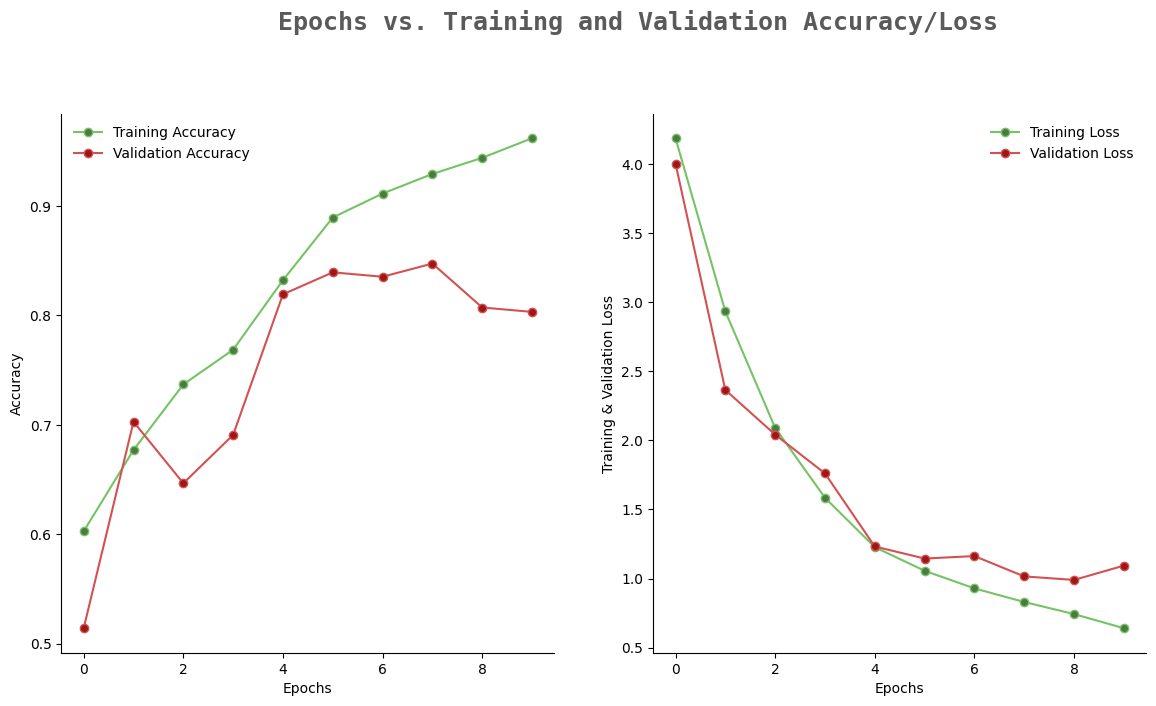

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

n_epochs = len(history.history['loss'])
epochs = [i for i in range(n_epochs)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step


In [ ]:
print(pred)
print(y_test_new)

[3 3 0 4 2 3 2 0 4 2 3 2 0 2 0 0 1 2 1 3 3 3 2 3 1 1 2 4 2 0 2 2 2 2 3 3 0
 3 4 3 2 2 3 0 0 0 3 3 3 4 1 0 4 3 0 3 3 1 0 1 3 0 0 3 3 0 0 2 3 3 3 1 0 2
 0 0 4 4 0 4 0 3 2 3 1 3 0 3 0 3 0 0 0 3 3 0 0 3 2 0 0 1 0 2 2 4 0 0 0 0 0
 3 0 3 0 3 3 1 0 0 3 0 4 2 4 0 3 0 4 3 4 3 3 2 2 3 2 4 4 3 3 0 3 2 4 4 3 0
 0 3 3 0 0 3 0 3 4 3 3 3 0 0 0 3 4 1 3 0 3 0 0 0 0 3 0 3 3 3 3 0 2 0 3 3 3
 0 0 0 2 4 3 4 0 3 4 3 2 0 1 0 0 1 0 0 3 3 3 2 0 1 2 4 3 2 4 3 3 0 0 0 3 0
 0 3 3 4 3 4 0 0 4 1 0 3 0 3 3 3 3 3 4 2 0 0 2 3 4 3 3 0 4 2 2 0 3 2 3 2 1
 3 3 0 3 1 4 4 1 3 2 0 0 3 4 0 0 3]
[3 3 0 4 2 3 0 2 4 2 2 2 0 2 0 0 1 2 1 3 3 3 2 3 1 4 2 4 0 0 2 2 2 2 3 3 4
 3 0 3 2 2 3 1 0 4 3 3 3 1 0 0 4 3 0 3 3 1 4 0 3 0 0 3 3 0 0 2 3 3 3 4 0 2
 4 0 4 4 0 4 0 3 2 3 0 3 1 3 0 3 0 0 0 3 3 0 0 3 2 0 0 1 0 2 2 4 0 0 0 0 0
 3 0 3 4 3 3 1 0 0 3 1 4 2 4 1 3 0 4 3 1 3 3 2 2 3 2 4 1 3 3 0 3 0 4 0 3 0
 0 3 3 0 0 3 0 3 4 3 3 3 0 0 0 3 0 0 3 2 3 0 4 2 0 3 0 3 3 3 3 0 2 4 3 3 3
 0 0 3 2 0 3 0 0 3 1 3 0 0 1 1 3 4 0 1 3 3 3 2 0 1 3 4 3 2 4 0 3

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        91
           1       0.42      0.44      0.43        18
           2       0.79      0.82      0.81        38
           3       0.98      0.97      0.97        96
           4       0.59      0.61      0.60        33

    accuracy                           0.80       276
   macro avg       0.71      0.72      0.72       276
weighted avg       0.80      0.80      0.80       276



In [ ]:
accuracy = np.sum(pred==y_test_new)/len(pred)
print("Accuracy on testing dataset: {:.3f}%".format(accuracy*100))

Accuracy on testing dataset: 80.072%


In [ ]:

cm=confusion_matrix(y_test_new,pred)
cm


array([[69,  6,  5,  1, 10],
       [ 6,  8,  0,  0,  4],
       [ 5,  1, 31,  1,  0],
       [ 2,  0,  1, 93,  0],
       [ 7,  4,  2,  0, 20]])

Text(95.72222222222221, 0.5, 'truth')

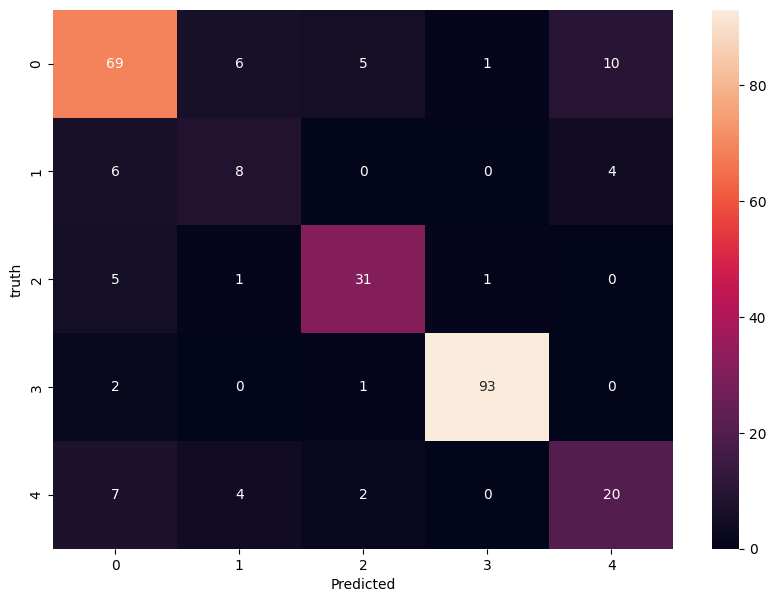

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('truth')